# Logpdf optimization

In [1]:
import numpy as np
from scipy.stats import truncnorm
from math import erf
import matplotlib.pyplot as plt

In [2]:
age, a, b, age_mean_pred, age_sigma_pred = np.load('truncnorm_dat.npy', allow_pickle=True)

In [3]:
%%time
print(age[0][0], a, b, age_mean_pred, age_sigma_pred)
lnprior = truncnorm.logpdf(age, a, b, loc=age_mean_pred, scale=age_sigma_pred)

0.08999387166766327 -1.2224857435210057 2.2275142564789947 4.889942974084023 4.0
CPU times: user 1.07 s, sys: 15.7 ms, total: 1.09 s
Wall time: 1.08 s


In [4]:
print(np.shape(age))

(50, 4470)


In [5]:
def _truncnorm_pdf(x, a, b, loc=0.0, scale=1.0):
    _a = scale*a + loc
    _b = scale*b + loc
    xi    = (x - loc) / scale
    alpha = (_a - loc) / scale
    beta  = (_b - loc) / scale
    
    phix = np.exp(-0.5 * xi**2) / np.sqrt(2.*np.pi)
    Phia = 0.5 *(1+erf(alpha/np.sqrt(2)))
    Phib = 0.5 *(1+erf(beta/np.sqrt(2)))

    ans = phix / (scale*(Phib-Phia))
   
    if not isinstance(x, (float,int)):
        keys = np.logical_or(x < _a, x > _b)
        ans[keys] = 0
    else:
        if x < _a or x > _b:
            ans = 0
    
    return ans

In [6]:
def _truncnorm_logpdf(x, a, b, loc=0.0, scale=1.0):
    _a = scale*a + loc
    _b = scale*b + loc
    xi    = (x - loc) / scale
    alpha = (_a - loc) / scale
    beta  = (_b - loc) / scale
    
    lnphi = -np.log(np.sqrt(2*np.pi)) - 0.5 * np.square(xi)
    lndenom = np.log(scale/2.0) + np.log(erf(beta/np.sqrt(2)) - erf(alpha/np.sqrt(2)))
    
    ans = np.subtract(lnphi, lndenom)
    
#     about 50 microseconds faster if the float check is not used
#     (tested on 50*4470 x array)
#     keys = np.logical_or(x < a, x > b)
#     ans[keys] = -np.inf
    
    if not isinstance(x, (float,int)):
        keys = np.logical_or(x < _a, x > _b)
        ans[keys] = -np.inf
    else:
        if x < _a or x > _b:
            ans = -np.inf
    
    return ans

In [7]:
%%time
print(age[0][0], a, b, age_mean_pred, age_sigma_pred)
my_lnprior = _truncnorm_logpdf(age, a, b, loc=age_mean_pred, scale=age_sigma_pred)

0.08999387166766327 -1.2224857435210057 2.2275142564789947 4.889942974084023 4.0
CPU times: user 3.56 ms, sys: 2.16 ms, total: 5.72 ms
Wall time: 3.75 ms


In [8]:
%%timeit
my_lnprior = _truncnorm_logpdf(age, a, b, loc=age_mean_pred, scale=age_sigma_pred)

1.18 ms ± 34.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
lnprior[0]

array([-2.89314978, -2.89296859, -2.89291747, ..., -2.20104886,
       -2.33807454, -2.36428208])

In [11]:
my_lnprior[0]

array([-2.89314978, -2.89296859, -2.89291747, ..., -2.20104886,
       -2.33807454, -2.36428208])

In [208]:
_truncnorm_logpdf(age[0][0], a, b, age_mean_pred, age_sigma_pred)

-2.8931497804402255

In [38]:
a

-1.2224857435210057

In [39]:
b

2.2275142564789947

In [86]:
truncnorm.pdf(0, -1, 0.5)

0.7487554126589395

In [88]:
_truncnorm_logpdf(0, -1, 0.5)

0.15865525393145707 0.691462461274013


0.7487554126589397

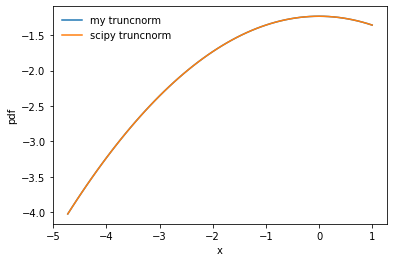

In [13]:
test_a = -2.4
test_b = 0.5

xlist = np.linspace(-6, 3, 100)
my_pdf = _truncnorm_logpdf(xlist, test_a, test_b, scale=2)
scipy_pdf = truncnorm.logpdf(xlist, test_a, test_b, scale=2)

plt.plot(xlist, my_pdf, label='my truncnorm')
plt.plot(xlist, scipy_pdf, label='scipy truncnorm')

plt.xlabel('x')
plt.ylabel('pdf')
plt.legend(frameon=False)

In [104]:
np.trapz(my_pdf, xlist)

1.0036229339495317

In [122]:
x = np.random.rand(int(1E6))
loc = 0.2
scale = 0.6

In [126]:
%%timeit
xt = np.subtract(x, loc) / scale

2.38 ms ± 79.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [127]:
%%timeit
xt = (x-loc)/scale

2.35 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [161]:
truncnorm.logpdf(0.2, -1, 1)

-0.5572233869025465

In [162]:
_truncnorm_logpdf(0.2, -1, 1)

0.2


-0.5572233869025466

In [156]:
isinstance(0, (float, int))

True

In [179]:
truncnorm.pdf(age[0][0], a, b, loc=age_mean_pred)#, scale=age_sigma_pred)

0.0

In [182]:
_truncnorm_pdf(age[0][0], a, b, loc=age_mean_pred)#, scale=age_sigma_pred)

0.0010214794015622637

In [174]:
age[0][0]

0.08999387166766327

In [175]:
a

-1.2224857435210057

In [176]:
b

2.2275142564789947

In [177]:
age_mean_pred

4.889942974084023